In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

In [5]:
data = pd.read_csv(r"C:\Users\HP\Desktop\MACHINE LEARNING\heartdataset.csv")

In [6]:
data.head()
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,53.275714,132.451429,183.681429,0.261429,132.607143,0.823143,0.578571
std,9.600592,18.635935,118.456079,0.439727,24.783150,1.015252,0.494141
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,107.500000,0.000000,116.000000,0.000000,0.000000
50%,54.000000,130.000000,215.000000,0.000000,130.000000,0.400000,1.000000
75%,60.000000,140.000000,261.000000,1.000000,150.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,190.000000,5.000000,1.000000


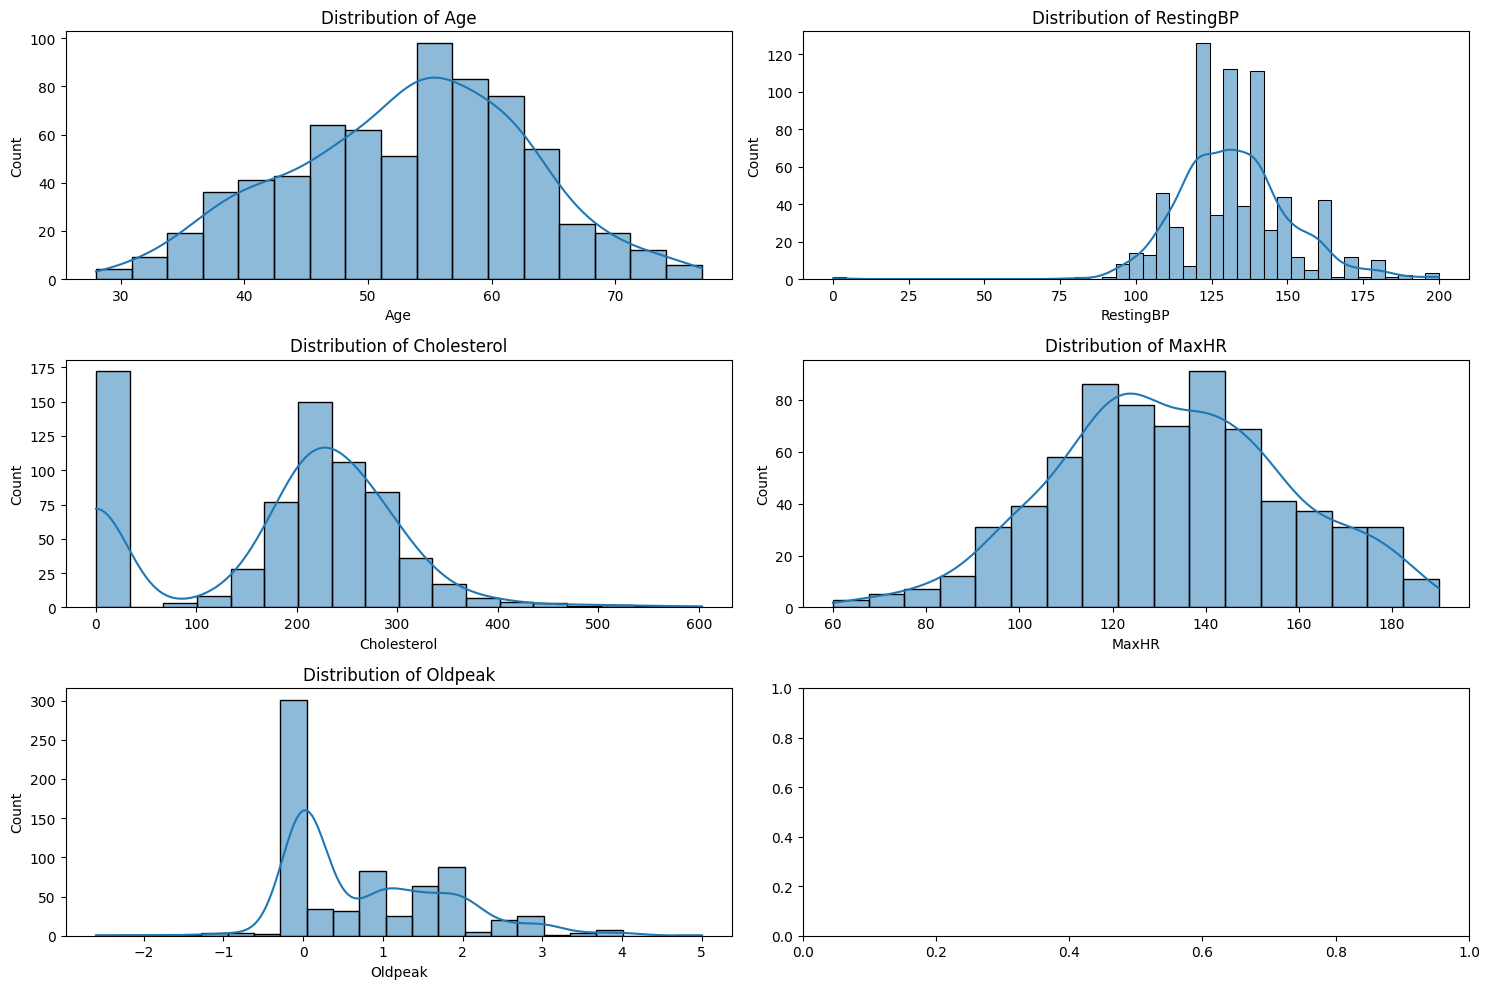

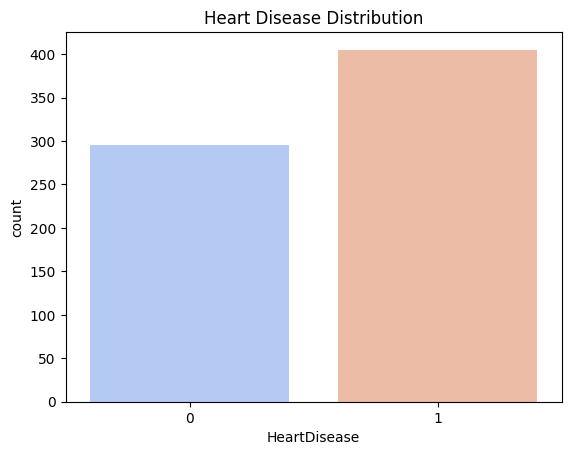

(Age               0
 Sex               0
 ChestPainType     0
 RestingBP         0
 Cholesterol       0
 FastingBS         0
 RestingECG        0
 MaxHR             0
 ExerciseAngina    0
 Oldpeak           0
 ST_Slope          0
 HeartDisease      0
 dtype: int64,
                Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
 count   700.000000  700           700  700.000000   700.000000  700.000000   
 unique         NaN    2             4         NaN          NaN         NaN   
 top            NaN    M           ASY         NaN          NaN         NaN   
 freq           NaN  576           393         NaN          NaN         NaN   
 mean     53.275714  NaN           NaN  132.451429   183.681429    0.261429   
 std       9.600592  NaN           NaN   18.635935   118.456079    0.439727   
 min      28.000000  NaN           NaN    0.000000     0.000000    0.000000   
 25%      47.000000  NaN           NaN  120.000000   107.500000    0.000000   
 50%      54.000000  N

In [7]:
missing_values = data.isnull().sum()

# Summary statistics
summary_stats = data.describe(include='all')

# Visualize the distribution of numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Visualize the target variable
sns.countplot(x='HeartDisease', data=data, palette='coolwarm')
plt.title('Heart Disease Distribution')
plt.show()

missing_values, summary_stats

C:\Users\HP\AppData\Local\Temp\ipykernel_4136\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

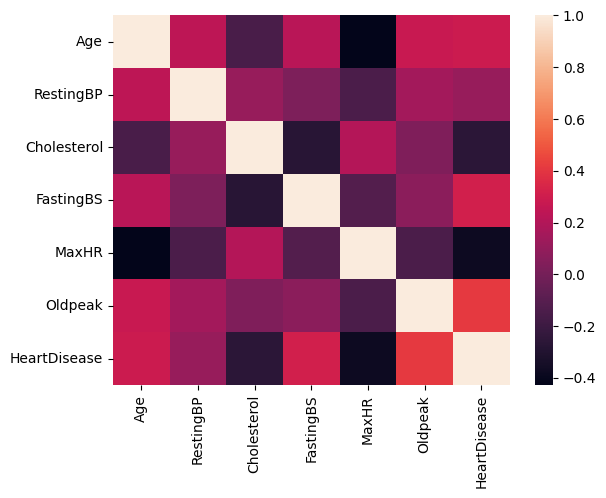

In [8]:
sns.heatmap(data.corr())

In [9]:
# Get required data
data.drop(columns=['FastingBS', 'Oldpeak'], inplace=True)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,Up,0
1,49,F,NAP,160,180,Normal,156,N,Flat,1
2,37,M,ATA,130,283,ST,98,N,Up,0
3,48,F,ASY,138,214,Normal,108,Y,Flat,1
4,54,M,NAP,150,195,Normal,122,N,Up,0


In [10]:
# Label encoding each categorical feature
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

le = LabelEncoder()
for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature])

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
0,40,1,1,140,289,1,172,0,2,0
1,49,0,2,160,180,1,156,0,1,1
2,37,1,1,130,283,2,98,0,2,0
3,48,0,0,138,214,1,108,1,1,1
4,54,1,2,150,195,1,122,0,2,0


<Axes: >

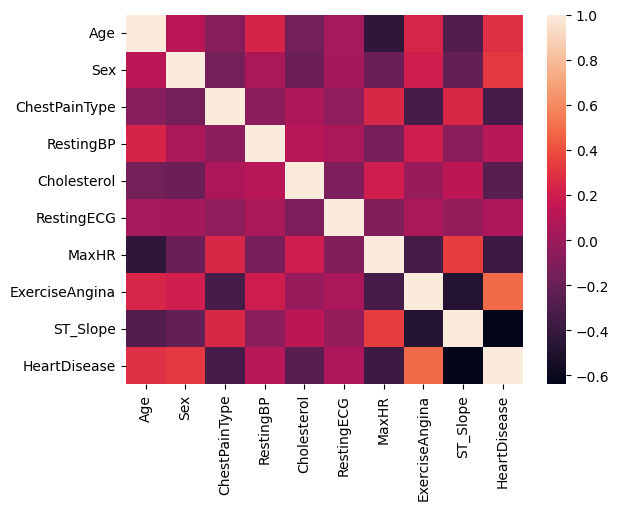

In [11]:
# Correlation matrix
data.corr()
sns.heatmap(data.corr())

In [12]:
# Drop column
data.drop(columns=['ST_Slope'], inplace=True)

In [13]:
# Split data into independent/dependent variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [14]:
# Split data into test/train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

In [15]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
#Decision Tree classification with Gini Index
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
#Decision Tree classification with Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [18]:
# Predict on test set
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)


In [19]:
# Evaluate accuracy
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_gini, accuracy_entropy

(0.7485714285714286, 0.7142857142857143)

In [20]:
# Evaluation metrics
print("Gini Model Classification Report:\n", classification_report(y_test, y_pred_gini))
print("Entropy Model Classification Report:\n", classification_report(y_test, y_pred_entropy))

Gini Model Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64        60
           1       0.81      0.80      0.81       115

    accuracy                           0.75       175
   macro avg       0.72      0.73      0.72       175
weighted avg       0.75      0.75      0.75       175

Entropy Model Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.77      0.65        60
           1       0.85      0.69      0.76       115

    accuracy                           0.71       175
   macro avg       0.71      0.73      0.70       175
weighted avg       0.75      0.71      0.72       175



<Axes: >

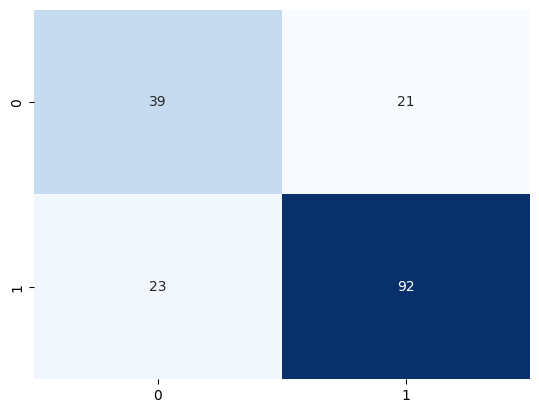

In [21]:
# Confusion matrices
confusion_gini = confusion_matrix(y_test, y_pred_gini)
sns.heatmap(confusion_gini, annot=True, fmt='d', cmap='Blues', cbar=False)

<Axes: >

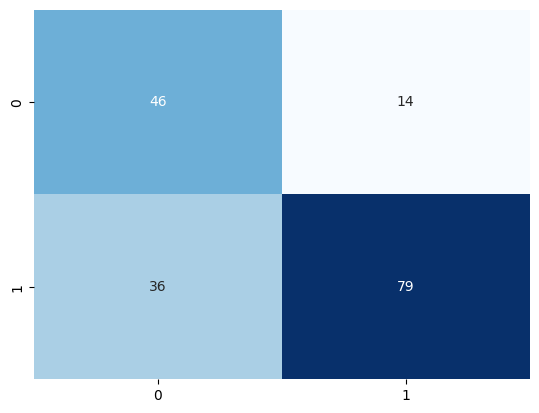

In [22]:
confusion_entropy = confusion_matrix(y_test, y_pred_entropy)
sns.heatmap(confusion_entropy, annot=True, fmt='d', cmap='Blues', cbar=False)

In [23]:
# Separate features and target
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

# Feature Importance
features = X.columns
importances_gini = dt_gini.feature_importances_
importances_entropy = dt_entropy.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Gini Importance': importances_gini,
    'Entropy Importance': importances_entropy
}).sort_values(by='Gini Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
          Feature  Gini Importance  Entropy Importance
4     Cholesterol         0.283415            0.297295
2   ChestPainType         0.253690            0.088741
6           MaxHR         0.155523            0.146412
7  ExerciseAngina         0.092651            0.183798
0             Age         0.081821            0.135431
3       RestingBP         0.069690            0.083881
5      RestingECG         0.033564            0.029373
1             Sex         0.029646            0.035069


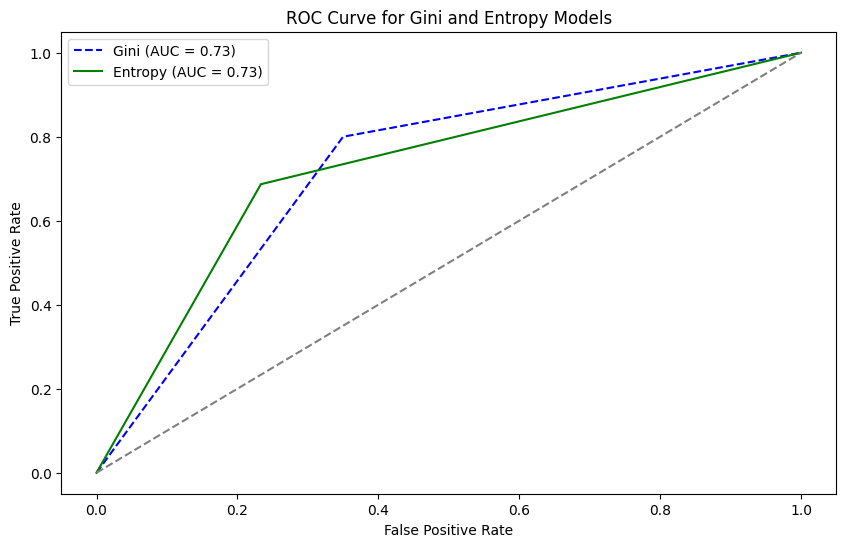

In [24]:
# Metrics calculation
metrics_gini = precision_recall_fscore_support(y_test, y_pred_gini, average='binary')
metrics_entropy = precision_recall_fscore_support(y_test, y_pred_entropy, average='binary')

# AUC scores
y_pred_gini_proba = dt_gini.predict_proba(X_test)[:, 1]
y_pred_entropy_proba = dt_entropy.predict_proba(X_test)[:, 1]
auc_gini = roc_auc_score(y_test, y_pred_gini_proba)
auc_entropy = roc_auc_score(y_test, y_pred_entropy_proba)

# ROC Curve
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_gini_proba)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_entropy_proba)

# Plotting ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_gini, tpr_gini, label=f'Gini (AUC = {auc_gini:.2f})', linestyle='--', color='blue')
plt.plot(fpr_entropy, tpr_entropy, label=f'Entropy (AUC = {auc_entropy:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gini and Entropy Models')
plt.legend()
plt.show()

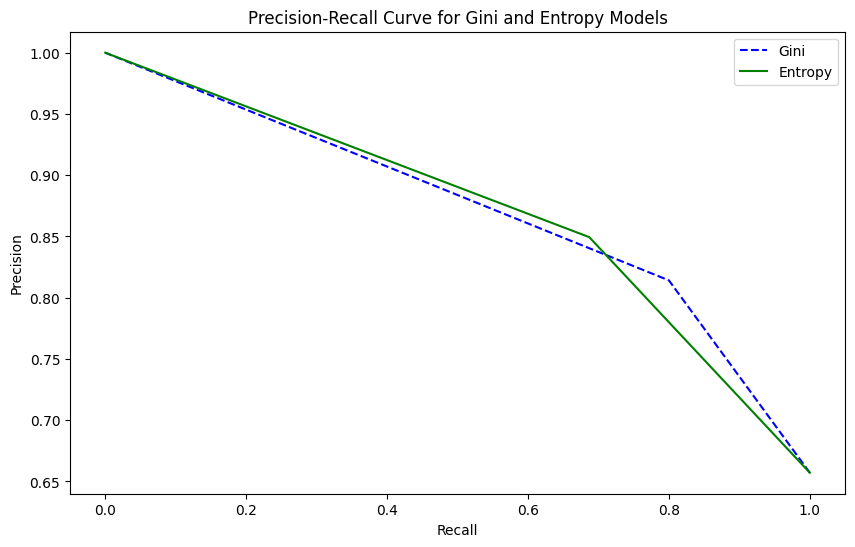

In [25]:
precision_gini, recall_gini, _ = precision_recall_curve(y_test, y_pred_gini_proba)
precision_entropy, recall_entropy, _ = precision_recall_curve(y_test, y_pred_entropy_proba)

# Plotting the Precision-Recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_gini, precision_gini, label='Gini', linestyle='--', color='blue')
plt.plot(recall_entropy, precision_entropy, label='Entropy', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gini and Entropy Models')
plt.legend()
plt.show()

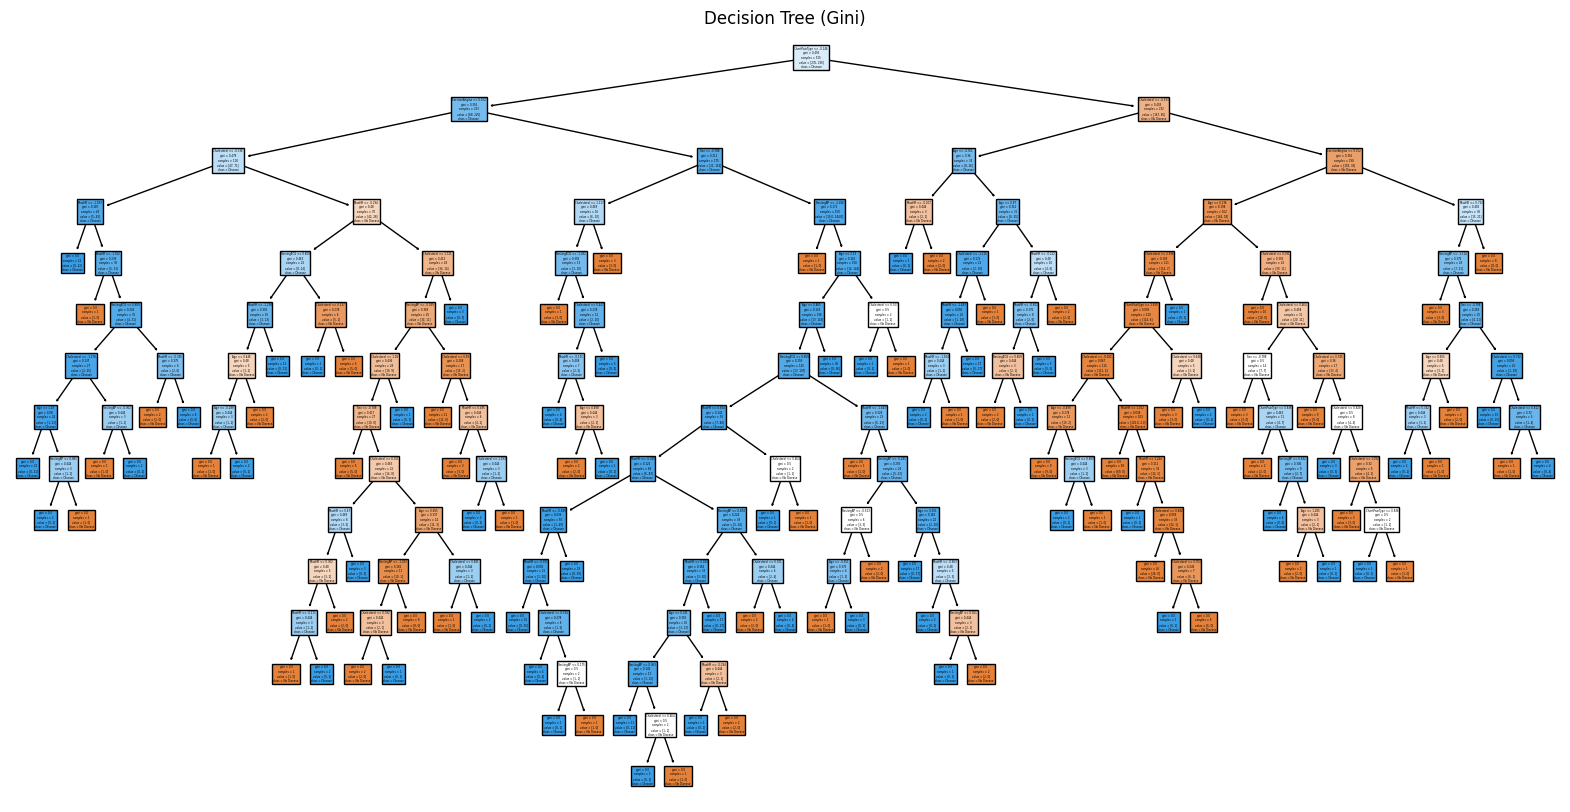

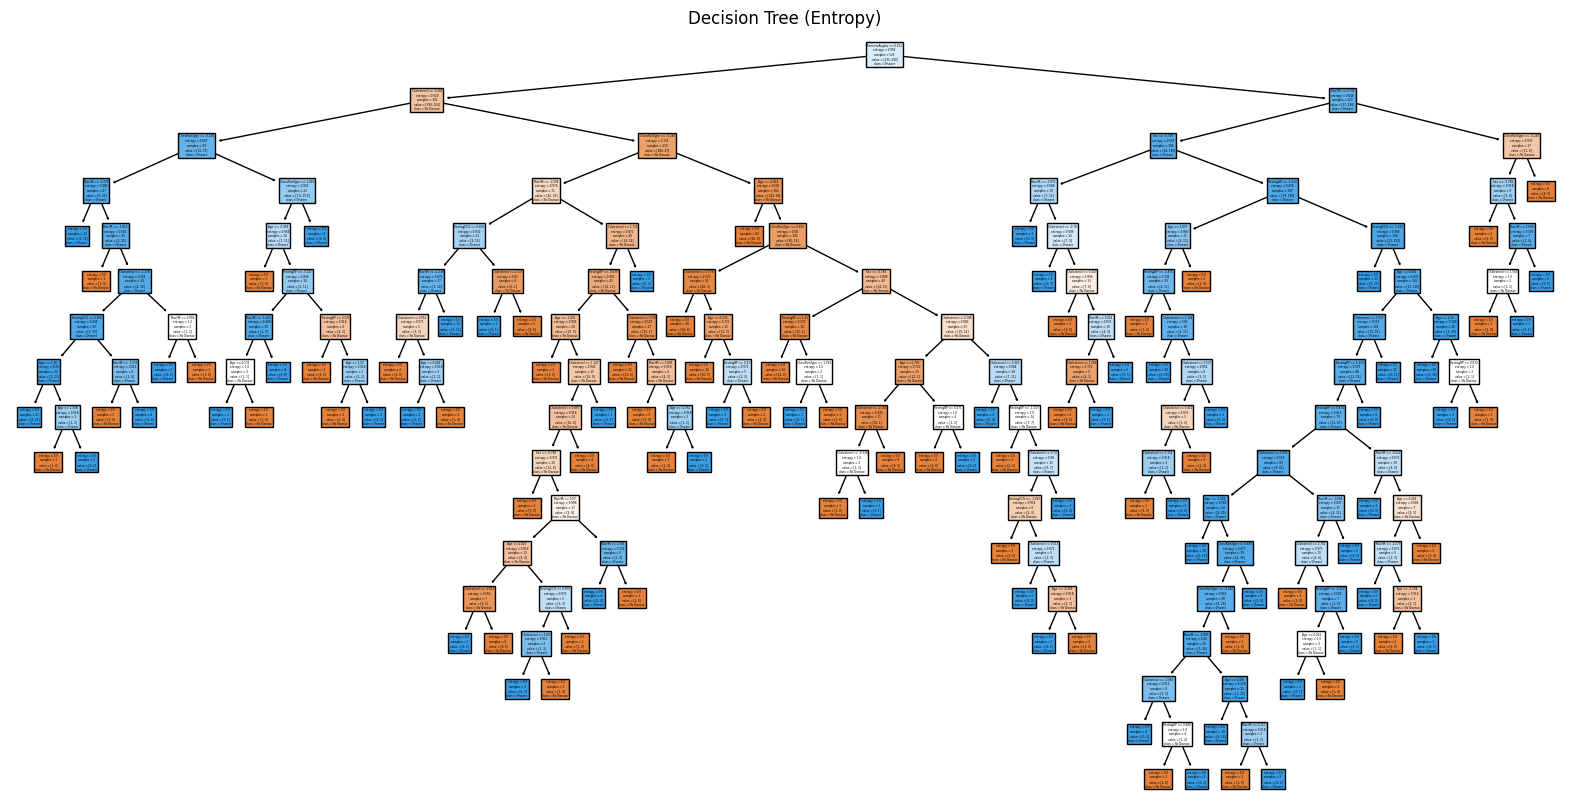

In [26]:
# Visualize Decision Trees
plt.figure(figsize=(20, 10))
plot_tree(dt_gini, feature_names=features, class_names=['No Disease', 'Disease'], filled=True)
plt.title('Decision Tree (Gini)')
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(dt_entropy, feature_names=features, class_names=['No Disease', 'Disease'], filled=True)
plt.title('Decision Tree (Entropy)')
plt.show()

In [27]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [28]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
confusion_matrix(y_train_pred,y_train)
confusion_matrix(y_test_pred,y_test)

Train score 0.8933333333333333
Test score 0.7714285714285715


array([[46, 26],
       [14, 89]], dtype=int64)

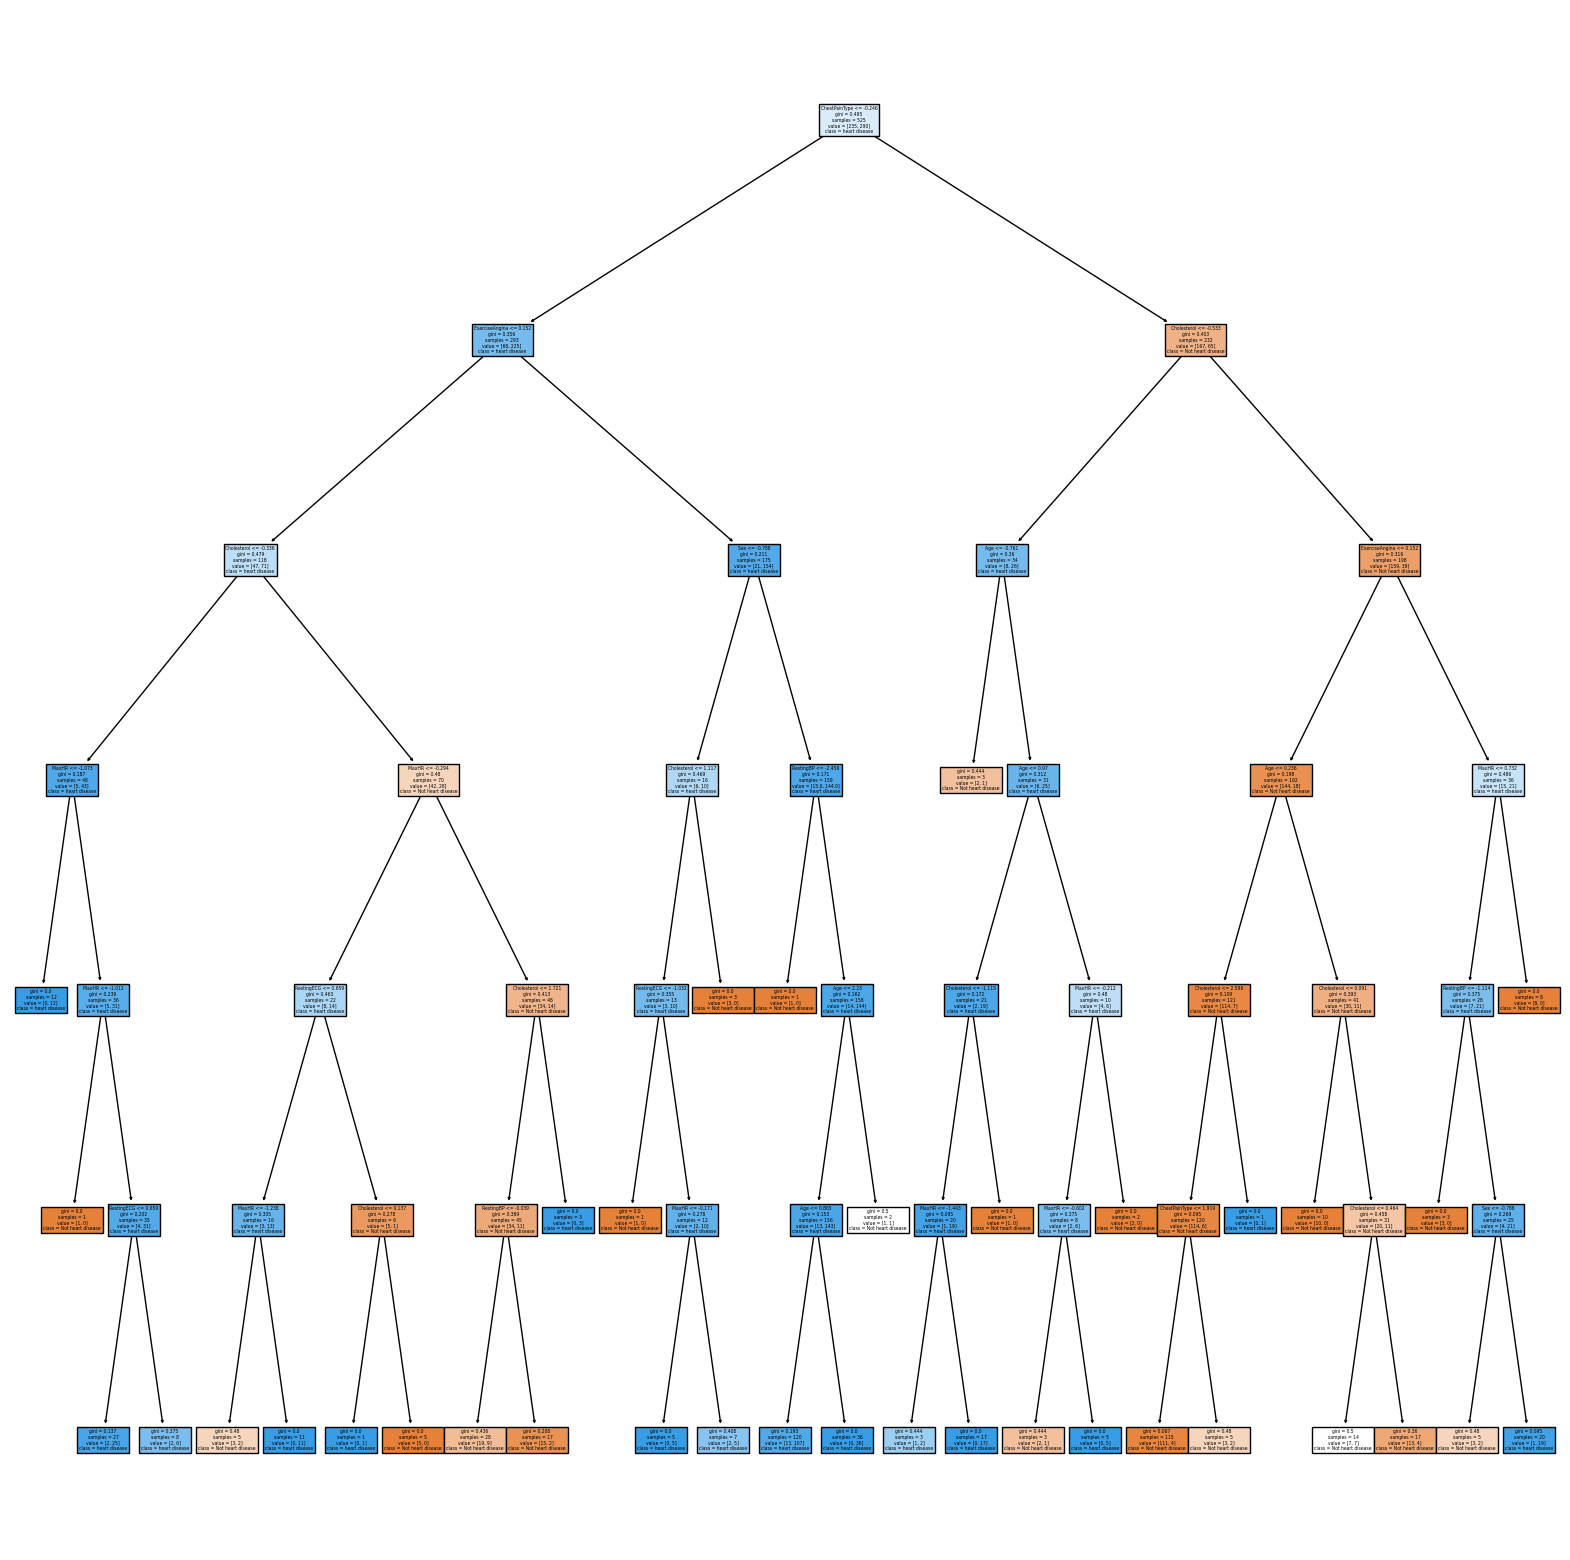

In [47]:
plt.figure(figsize=(20,20))
features = data.columns
classes = ['Not heart disease','heart disease']
plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

In [48]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00093333 0.00152381 0.00175824 0.00176367 0.00180952
 0.00180952 0.00184704 0.00188851 0.00190476 0.00190476 0.0021164
 0.00220869 0.00220874 0.0022409  0.00228571 0.00228571 0.00241232
 0.002442   0.00249387 0.0025022  0.00253968 0.00253968 0.00253968
 0.00292138 0.00314443 0.0031746  0.00338624 0.00347196 0.00361236
 0.00362669 0.00460952 0.00471429 0.00492838 0.00516639 0.0061164
 0.00688095 0.0072     0.01333333 0.02373193 0.02502165 0.03563034
 0.1173421 ]


In [49]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

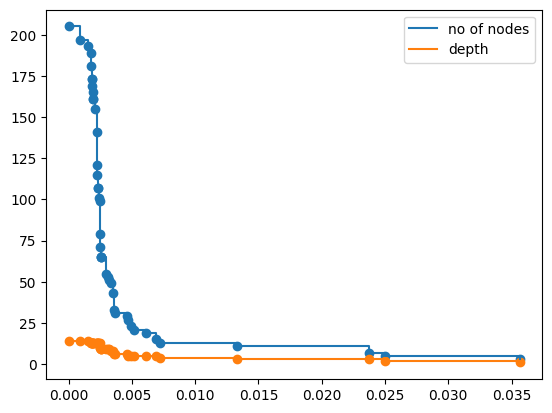

In [50]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

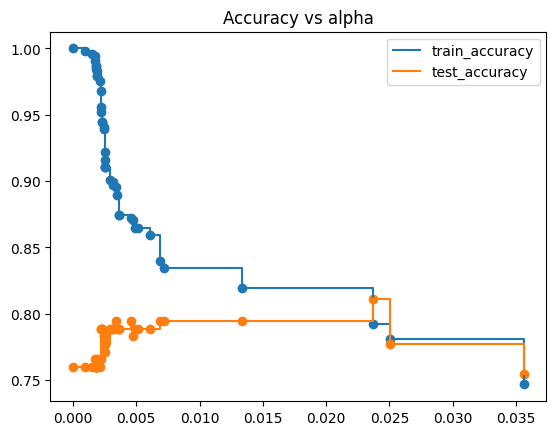

In [51]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [52]:
clf_ =DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
confusion_matrix(y_train_pred,y_train)
confusion_matrix(y_test_pred,y_test)

Train score 0.819047619047619
Test score 0.7942857142857143


array([[48, 24],
       [12, 91]], dtype=int64)

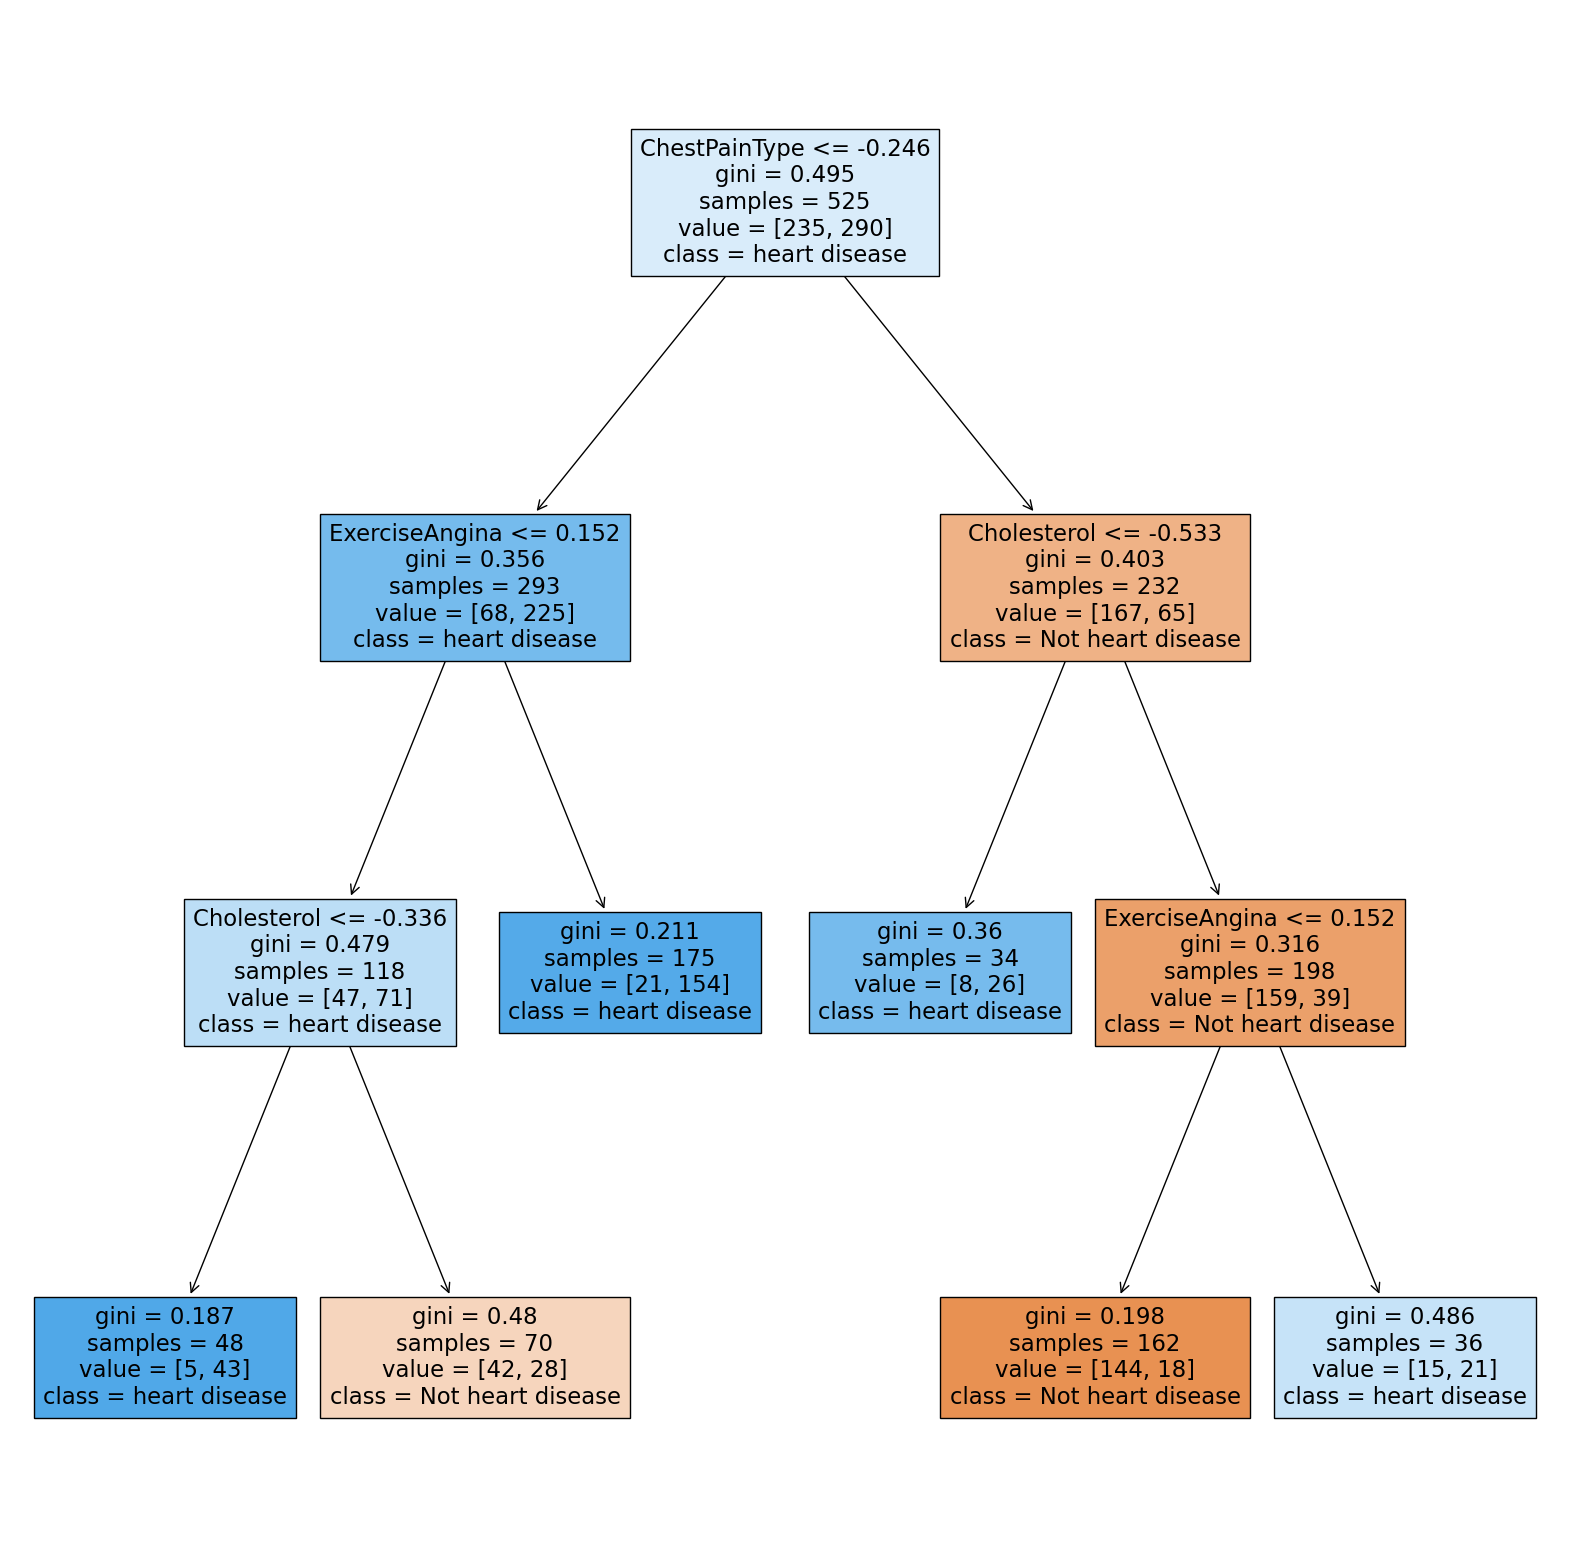

In [53]:
plt.figure(figsize=(20,20))
features = data.columns
classes = ['Not heart disease','heart disease']
plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

In [54]:
# Comparative Analysis
comparison_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'AUC'],
    'Gini': [metrics_gini[0], metrics_gini[1], metrics_gini[2], auc_gini],
    'Entropy': [metrics_entropy[0], metrics_entropy[1], metrics_entropy[2], auc_entropy]
})

comparison_df

,Metric,Gini,Entropy
0,Precision,0.814159,0.849462
1,Recall,0.800000,0.686957
2,F1-Score,0.807018,0.759615
3,AUC,0.725000,0.726812


In [55]:
# Entropy criterion is slightly higher across all the evaluated metrics(Precision, Recall, F1-Score, and AUC).